In [1]:
import numpy as np
from scipy.integrate import quad
import GSM.MGSM_inference as inf
from matplotlib import pyplot as plt

def dot(LL):
    if len(LL) == 2:
        return np.dot(LL[0],LL[1])
    else:
        return np.dot(LL[0],dot(LL[1:]))
    

Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
In file included from /tmp/try_flags_QawJbi.c:4:0:
/home/gbarello/miniconda3/envs/theano_GPU/include/cudnn.h:63:26: fatal error: driver_types.h: No such file or directory
compilation terminated.

Mapped name None to device cuda2: TITAN Xp (0000:81:00.0)


In [9]:
def pg(g,m,s):
    return np.exp(-(g- m)*(g- m)/(2*s*s))/np.sqrt(2 * np.pi *s*s)

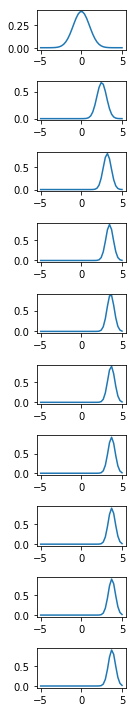

In [20]:
#I want to make a figure that shows the initial distribution of $\vg$
NN = 40

cov = np.array([[1]])
ncov = cov
F = .9 * cov
Qcov = cov - dot([F,cov,F])

II = 5*np.ones([10,1])
go,po = inf.att_egia(0,II,1,cov,ncov,Qcov,F,getP=True)


fig,sub = plt.subplots(10,1,figsize = (2,10))
pnts = np.linspace(-5,5,40)

subf = sub[0]
subf.plot(pnts,pg(pnts,0,1))

for k in range(1,len(sub)):
    subf = sub[k]
    subf.plot(pnts,pg(pnts,go[k-1,0],po[k-1,0,0]))

plt.tight_layout()
plt.show()